In [25]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from bayesian_sde_solver.utils import insert


solver_name = "EKF0_2"
problem_name = "FHN_uncalibrated"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

N = 50
delta = 1 / N
fineN = int(N ** 1.0)
T = 1
Ndeltas = T / delta
no_samples = 2

euler_parabola_ode_sols=jnp.load(f'{folder}/{prefix}_pathwise_sols4_parabola_ode_{N}_{fineN}.npy')
fine_em = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fineN}.npy')
low_res_em = jnp.load(f'{folder}/{prefix}_pathwise_sols3_{N}_{fineN}.npy')
mean = jnp.load(f'{folder}/{prefix}_mean_pn_{N}_1.npy')
var = jnp.load(f'{folder}/{prefix}_var_pn_{N}_1.npy')

In [4]:
def z_scores(x, mean, std):
    return (x - mean) / std
    

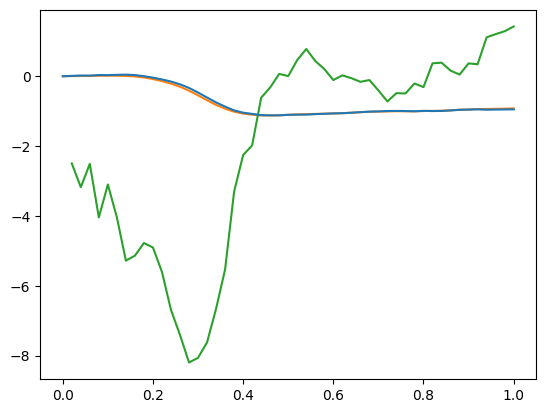

In [26]:
t = np.linspace(0,T, N+1)
# Select the coordinate, initialisation to (0, 0)
idx = 0
x_mean = insert(mean[:,idx*2], 0, 0., axis=0)
x_std = insert(np.sqrt(var[:,idx*2,idx*2]), 0, 0, 0)
plt.errorbar(x=t, y=x_mean, yerr=x_std)
fine = fine_em[::N][:,idx]

plt.plot(t, fine)
plt.plot(t, z_scores(fine, x_mean, x_std))
np.savetxt(f'{prefix}_UC_{idx}_{N}_{fineN}.csv', np.array([t, x_mean, x_std]).T, delimiter=',', header='t,mean,error', comments="")
np.savetxt(f'{prefix}_fine_{idx}_{N}_{fineN}.csv', np.array([t, fine]).T, delimiter=',', header='t,mean', comments="")
np.savetxt(f'{prefix}_zscore_{idx}_{N}_{fineN}.csv', np.array([t, z_scores(fine, x_mean, x_std)]).T, delimiter=',', header='t,zscore', comments="")

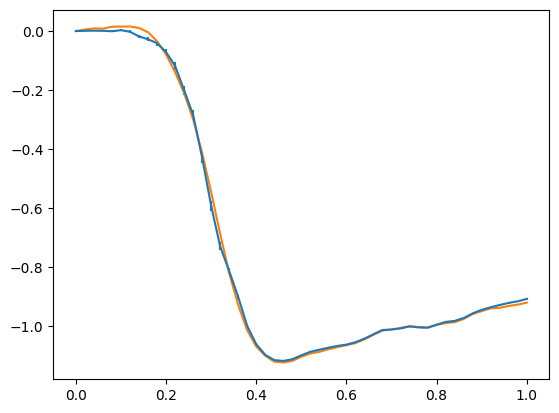

In [29]:
t = np.linspace(0,T, N+1)
# Select the coordinate, initialisation to (0, 0)
idx = 0
x_mean = insert(mean[:,idx*2], 0, 0., axis=0)
x_std = insert(np.sqrt(var[:,idx*2,idx*2]), 0, 0, 0)
plt.errorbar(x=t, y=x_mean, yerr=x_std)
fine = fine_em[::N][:,idx]

plt.plot(t, fine)
np.savetxt(f'{prefix}_UC_{idx}_{N}_{fineN}.csv', np.array([t, x_mean, x_std]).T, delimiter=',', header='t,mean,error', comments="")
np.savetxt(f'{prefix}_fine_{idx}_{N}_{fineN}.csv', np.array([t, fine]).T, delimiter=',', header='t,mean', comments="")

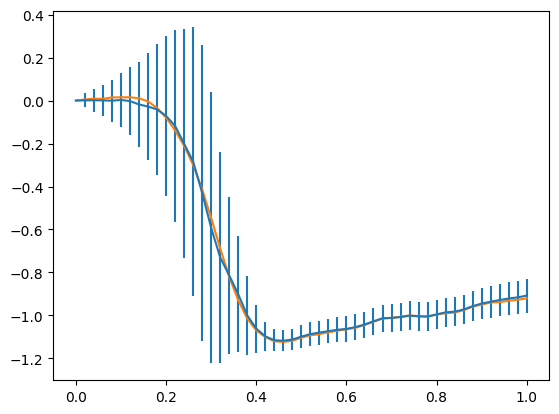

In [31]:
t = np.linspace(0,T, N+1)
# Select the coordinate, initialisation to (0, 0)
idx = 0
x_mean = insert(mean[:,idx*2], 0, 0., axis=0)
x_std = insert(np.sqrt(var[:,idx*2,idx*2]), 0, 0, 0)
plt.errorbar(x=t, y=x_mean, yerr=x_std)
fine = fine_em[::N][:,idx]

plt.plot(t, fine)
np.savetxt(f'{prefix}_UC_{idx}_{N}_{fineN}.csv', np.array([t, x_mean, x_std]).T, delimiter=',', header='t,mean,error', comments="")
np.savetxt(f'{prefix}_fine_{idx}_{N}_{fineN}.csv', np.array([t, fine]).T, delimiter=',', header='t,mean', comments="")

In [8]:
var[:,idx*2,idx*2]**0.5

Array([0.0008165 , 0.0011547 , 0.00141421, 0.00163299, 0.00182574,
       0.002     , 0.00216025, 0.0023094 , 0.00244949, 0.00258199,
       0.00270801, 0.00282843, 0.00294392, 0.00305505, 0.00316228,
       0.00326599, 0.0033665 , 0.0034641 , 0.00355903, 0.00365148,
       0.00374166, 0.00382971, 0.00391578, 0.004     , 0.00408248,
       0.00416333, 0.00424264, 0.00432049, 0.00439697, 0.00447214,
       0.00454606, 0.0046188 , 0.00469041, 0.00476095, 0.00483046,
       0.00489898, 0.00496655, 0.00503322, 0.00509902, 0.00516398,
       0.00522813, 0.0052915 , 0.00535412, 0.00541602, 0.00547722,
       0.00553774, 0.00559761, 0.00565685, 0.00571547, 0.0057735 ],      dtype=float32)

In [30]:
np.sqrt(var[:,idx*2,idx*2])

array([0.06165858, 0.0814712 , 0.09536274, 0.1112305 , 0.12781508,
       0.13417868, 0.1363107 , 0.13788947, 0.1380421 , 0.13767266,
       0.13731167, 0.13660944, 0.13618101, 0.13627034, 0.13668226,
       0.13723257], dtype=float32)

In [103]:
x_std

Array([0.        , 0.20419881, 0.2428347 , 0.26874074, 0.28878072,
       0.30534843, 0.3195884 , 0.332145  , 0.3434201 , 0.35368255,
       0.36312237, 0.3718786 , 0.38005665, 0.3877385 , 0.39498907,
       0.40186104, 0.4083975 , 0.4146344 , 0.4206019 , 0.4263257 ,
       0.43182778, 0.4371273 , 0.44224077, 0.44718277, 0.4519662 ,
       0.45660236], dtype=float32)

In [68]:
fine_em[1:][::20][:,0]

Array([0.        , 0.19945133, 0.256763  , 0.30959582, 0.36328647,
       0.41841513, 0.47287127, 0.5223503 , 0.5556355 , 0.56173813,
       0.5296579 , 0.4655714 , 0.39366007, 0.32331917, 0.273679  ,
       0.24877873, 0.24236478, 0.243749  , 0.24609932, 0.24702007,
       0.24720842, 0.24691135, 0.2475651 , 0.24854922, 0.2505748 ,
       0.25329423, 0.25520134, 0.25547075, 0.255506  , 0.25587237,
       0.25674388, 0.25683826, 0.25763065, 0.2601026 , 0.26262957,
       0.26369625, 0.2608365 , 0.25914595, 0.25850788, 0.25757995,
       0.25602597], dtype=float32)

In [13]:
fine_em.shape

(401, 2)

In [10]:
fine_em[1:.shape

(401, 2)